## Twitter Sentiment Analysis 

An introduction to tweet sentiment analysis using Python libraries and then using the data output to build dynamic dashboards in Power BI.

### Python libraries used:

   * Pandas and Numpy (for data manipulation)
   * GetOldTweets3 (for extracting tweets)
   * TextBlob (for sentiment analysis)




In [1]:
import GetOldTweets3 as got
import re, string
from textblob import TextBlob
import numpy as np
import pandas as pd
import glob
pd.set_option('max_colwidth',150)


#Tweet Streaming
# input for term to be searched and how many tweets to search

# userslist =   'realDonaldTrump', 'cnnbrk', 'narendramodi','BillGates', 'BBCBreaking', 'NASA', 'imVkohli', 'elonmusk', 'katyperry'

users = ['realDonaldTrump', 'cnnbrk', 'narendramodi','BillGates', 'BBCBreaking', 'NASA',
         'imVkohli', 'elonmusk', 'nytimes']
# count = int(input("Enter h'nytimes',ow many tweets to search: "))
# .setQuerySearch(text_query)
# setUsername(text_query)

for user in users:
    tweetCriteria = got.manager.TweetCriteria().setUsername(user)\
                                               .setLang('en').setEmoji("unicode")\
                                               .setMaxTweets(1500)    
    tweets = got.manager.TweetManager.getTweets(tweetCriteria)
    text_tweets = [[tweet.date,
                tweet.username,
                tweet.text,
                len(tweet.text),
                tweet.to,
                tweet.retweets,
                tweet.favorites,
                tweet.hashtags,
                tweet.mentions] for tweet in tweets]
    data = pd.DataFrame(text_tweets, columns = ['Datetime',
                                                 'User',
                                                 'Tweet',
                                                 'Tweet_Length',
                                                 'Tweet_To',
                                                 'Retweets',
                                                 'Favorites',
                                                 'Hashtags',
                                                 'Mentions'])
    data['Time_between_tweets'] = data['Datetime'].diff(periods=-1)
    
    def clean_text(text):
        text = text.lower()
        text = re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t]) | (\w +:\ / \ / \S +)", " ", text)
        text = re.sub('\[.*?\]', '', text)
        text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
        text = re.sub('\w*\d\w*', '', text)
        text = re.sub('[‘’“”…]', '', text)
        text = re.sub('\n', '', text)
        return text
    
    data['Cleaned_tweet'] = pd.DataFrame(data.Tweet.apply(lambda x: clean_text(x)))
    
    pol = lambda x: TextBlob(x).sentiment.polarity
    sub = lambda x: TextBlob(x).sentiment.subjectivity
    secs = lambda x: pd.to_timedelta(x).total_seconds()
    
    data['Polarity'] = data['Cleaned_tweet'].apply(pol)
    data['Subjectivity'] = data['Cleaned_tweet'].apply(sub)
    data['Cleaned_Tweet_Length'] = data['Cleaned_tweet'].apply(len)
    data['Time_between_tweets_in_secs'] = data['Time_between_tweets'].apply(secs)
    
    data.to_csv('D:\Jupyter Notebooks\individual tweets collection\{}-tweets.csv'.format(user), sep=',')
    

#appending all individual files as one
path =r'D:\Jupyter Notebooks\individual tweets collection'
allFiles = glob.glob(path + "/*.csv")
frame = pd.DataFrame()
list = []
for file in allFiles:
    df = pd.read_csv(file)
    list.append(df)
data = pd.concat(list)
data.rename(columns = {'Unnamed: 0':'Column1'}, inplace = True)


# saving the combined csv as a .csv file  
data.to_csv("D:\Jupyter Notebooks\individual tweets collection\masterdata\combined.csv",index=False)
    


In [2]:
import pandas as pd
pd.read_csv('D:\Jupyter Notebooks\individual tweets collection\masterdata\combined.csv')

,Column1,Datetime,User,Tweet,Tweet_Length,Tweet_To,Retweets,Favorites,Hashtags,Mentions,Time_between_tweets,Cleaned_tweet,Polarity,Subjectivity,Cleaned_Tweet_Length,Time_between_tweets_in_secs
0,0,2020-03-12 17:02:33+00:00,BBCBreaking,People with a persistent cough or fever told t...,109,NaN,689,1191,NaN,NaN,0 days 00:53:41.000000000,people with a persistent cough or fever told t...,0.000000,0.000000,106,3221.0
1,1,2020-03-12 16:08:52+00:00,BBCBreaking,Canadian Prime Minister Justin Trudeau self-is...,97,NaN,2593,3876,NaN,NaN,0 days 04:25:21.000000000,canadian prime minister justin trudeau selfiso...,0.000000,0.000000,95,15921.0
2,2,2020-03-12 11:43:31+00:00,BBCBreaking,Indoor mass gatherings in Ireland of more than...,228,NaN,767,1570,#coronaviruspandemic,NaN,0 days 00:04:43.000000000,indoor mass gatherings in ireland of more than...,0.180000,0.440000,197,283.0
3,3,2020-03-12 11:38:48+00:00,BBCBreaking,"All schools, colleges and childcare facilities...",221,NaN,3155,6262,#CoronavirusPandemic,NaN,0 days 10:30:54.000000000,all schools colleges and childcare facilities ...,0.068182,0.227273,195,37854.0
4,4,2020-03-12 01:07:54+00:00,BBCBreaking,President Trump suspends all travel to US from...,115,NaN,6734,11880,NaN,NaN,0 days 08:32:05.000000000,president trump suspends all travel to us from...,-0.062500,0.187500,110,30725.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13495,1495,2019-11-11 02:25:09+00:00,realDonaldTrump,If Iran is able to turn over to the U.S. kidna...,280,NaN,17768,72579,NaN,NaN,0 days 03:22:17.000000000,if iran is able to turn over to the us kidnapp...,-0.052424,0.395960,264,12137.0
13496,1496,2019-11-10 23:02:52+00:00,realDonaldTrump,".@NikkiHaley is out with a new book, “With All...",191,NikkiHaley,12420,52992,NaN,@NikkiHaley,0 days 03:19:21.000000000,is out with a new book with all due respect ...,0.302841,0.579609,173,11961.0
13497,1497,2019-11-10 19:43:31+00:00,realDonaldTrump,The call to the Ukrainian President was PERFEC...,278,NaN,21643,94477,NaN,NaN,0 days 00:37:16.000000000,the call to the ukrainian president was perfec...,-0.060000,0.800000,268,2236.0
13498,1498,2019-11-10 19:06:15+00:00,realDonaldTrump,“There’s nothing there! I’m trying to let the ...,279,NaN,18812,71216,NaN,@LindseyGrahamSC,0 days 00:08:01.000000000,theres nothing there im trying to let the hous...,-0.475000,0.750000,252,481.0


### Business Questions to ponder upon..

*  How often does an user tweet?
*  What's the polarity trend of an user?
*  Correlation between variables

Using the data collected, I built a dynamic dashboard in MS Power BI. Here's a screenshot of the dashboard:


![](https://raw.githubusercontent.com/Arnab-Rajkhowa/Twitter-Sentiment-Analysis/master/tweet-dashboard.PNG)
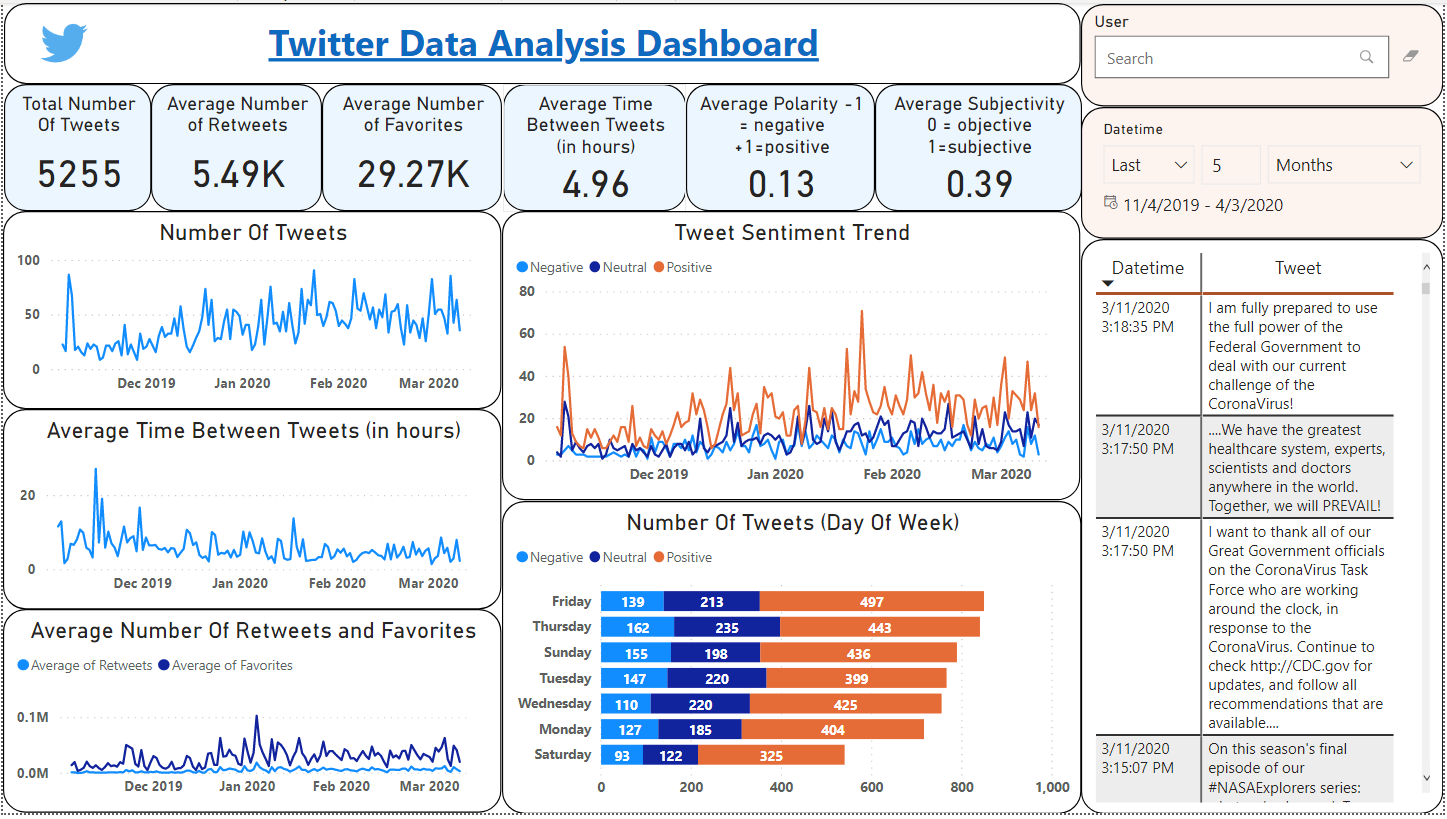

To use the dashboard yourself, refer to this link:


**[Twitter Dashboard](https://app.powerbi.com/view?r=eyJrIjoiYTA0YjFlZjctNGY5Ni00MzQ2LTkzYTQtYWQ4YzNiNTU3YjJkIiwidCI6IjgwZjIzZjRhLTkxYTQtNDU2Ni04ZGIxLTNiY2FiYjIxZDFjYiIsImMiOjF9)**